# Fake News Detection




## Objective


The objective of this project is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this project, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the project:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data 
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this project, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
# !pip install --upgrade numpy==1.26.4
# !pip install --upgrade pandas==2.2.2
# !pip install --upgrade nltk==3.9.1
# !pip install --upgrade spacy==3.7.5
# !pip install --upgrade scipy==1.12
# !pip install --upgrade pydantic==2.10.5
# !pip install wordcloud==1.9.4
# !python -m spacy download en_core_web_sm

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
# Import the first file - True.csv
true_df = pd.read_csv('True.csv')
# Import the second file - Fake.csv
fake_df = pd.read_csv('Fake.csv')

## **1.** Data Preparation





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data
true_df.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [6]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former

In [7]:
# Print the column details for True News DataFrame
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [8]:
# Print the column details for Fake News Dataframe
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [9]:
# Print the column names of both DataFrames
print(true_df.columns)
print(fake_df.columns)

Index(['title', 'text', 'date'], dtype='object')
Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column 

Add new column `news_label` to both the DataFrames and assign labels

In [10]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = '1'
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = '0'

### **1.2** Merge DataFrames 

Create a new Dataframe by merging True and Fake DataFrames

In [11]:
# Combine the true and fake news DataFrames into a single DataFrame
news_df = pd.concat([true_df, fake_df], ignore_index=True)

In [12]:
# Display the first 5 rows of the combined DataFrame to verify the result
news_df.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values 

Check for null values and handle it by imputation or dropping the null values

In [13]:
# Check Presence of Null Values
news_df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [14]:
# Handle Rows with Null Values
news_df = news_df.dropna(subset = ['title','text'])

In [15]:
news_df.isnull().sum()

title          0
text           0
date          21
news_label     0
dtype: int64

Not removing null values under 'date' column as it is not important for our analysis and the column itself shall be removed in the next step.

In [16]:
news_df.shape

(44919, 4)

### **1.4** Merge the relevant columns and drop the rest from the DataFrame 

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [17]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news_df['news_text'] = news_df['title'] + ' ' + news_df['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
news_df = news_df.drop(['title','text','date'], axis=1)
# Display the first 5 rows of the updated DataFrame to check the result
news_df.head()

news_label  \
0          1   
1          1   
2          1   
3          1   
4          1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [18]:
news_df.isnull().sum()

news_label    0
news_text     0
dtype: int64

## **2.** Text Preprocessing






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning 



#### 2.1.0 Create a new DataFrame to store the processed data



In [19]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = news_df['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements 



In [20]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
    text = str(text)
    # Convert to lower case
    text = text.lower()
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove words with numbers
    text = ' '.join(word for word in text.split() if not any(char.isdigit() for char in word))
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. 


In [21]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['news_text'] = news_df['news_text'].apply(clean_text)

In [22]:
df_clean.shape

(44919, 2)

### **2.2** POS Tagging and Lemmatization 



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags 



In [23]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def lemmatize_filter_nouns_spacy(text):
    doc = nlp(text)
    nouns = [
        token.lemma_ for token in doc
        if token.pos_ == "NOUN" and not token.is_stop and token.is_alpha
    ]
    return ' '.join(nouns)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. 

NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.

This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.


In [24]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['pos_lemma'] = df_clean['news_text'].progress_apply(lemmatize_filter_nouns_spacy)

100%|████████████████████████████████████████████████████████████████████████████| 44919/44919 [32:34<00:00, 22.99it/s]


### Save the Cleaned data as a csv file (Recommended)

In [25]:
df_clean.isnull().sum()

news_label    0
news_text     0
pos_lemma     0
dtype: int64

In [26]:
df_clean = df_clean.dropna()

In [27]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [28]:
# Check the first few rows of the DataFrame
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [29]:
df_clean.isnull().sum()

news_label     0
news_text      9
pos_lemma     21
dtype: int64

In [30]:
df_clean = df_clean.dropna()

In [31]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 3)

In [32]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 44918
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   news_label  44898 non-null  int64 
 1   news_text   44898 non-null  object
 2   pos_lemma   44898 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


## **3.** Train Validation Split 

In [33]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_clean, train_size=0.7, test_size=0.3, random_state=42)

## **4.** Exploratory Data Analysis on Training Data 

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed 



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns 



In [34]:
# Add a new column to calculate the character length of cleaned news text
train_df['text_character_length'] = train_df['news_text'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemma_character_length'] = train_df['pos_lemma'].apply(len)

##### 4.1.2  Create Histogram to visualise character lengths 

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

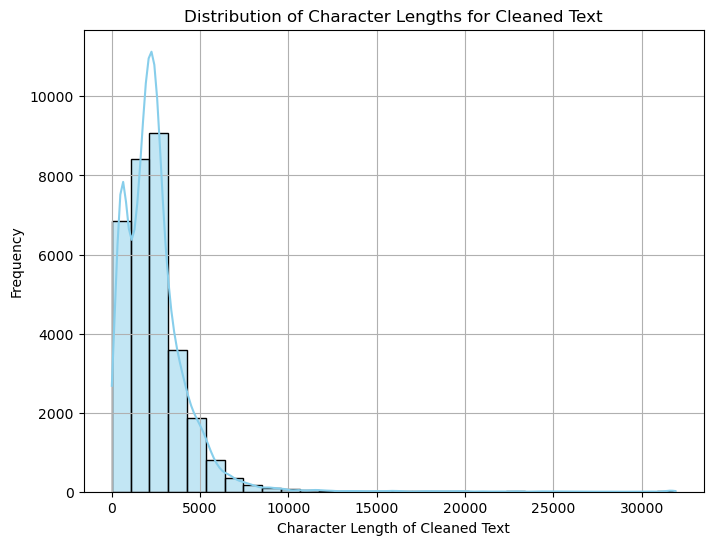

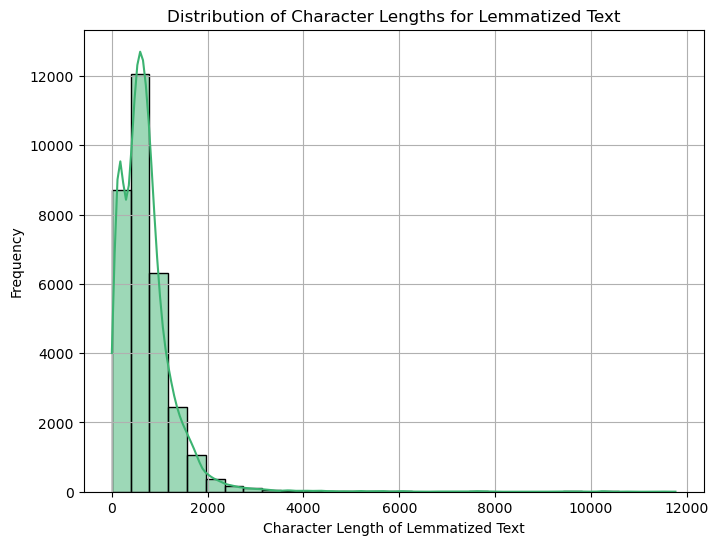

In [35]:
## Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text
plt.figure(figsize=(8, 6))
sns.histplot(train_df['text_character_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Character Lengths for Cleaned Text')
plt.xlabel('Character Length of Cleaned Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Add histogram for lemmatized news text with POS tags removed
plt.figure(figsize=(8, 6))
sns.histplot(train_df['lemma_character_length'], bins=30, kde=True, color='mediumseagreen')
plt.title('Distribution of Character Lengths for Lemmatized Text')
plt.xlabel('Character Length of Lemmatized Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text 



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text 

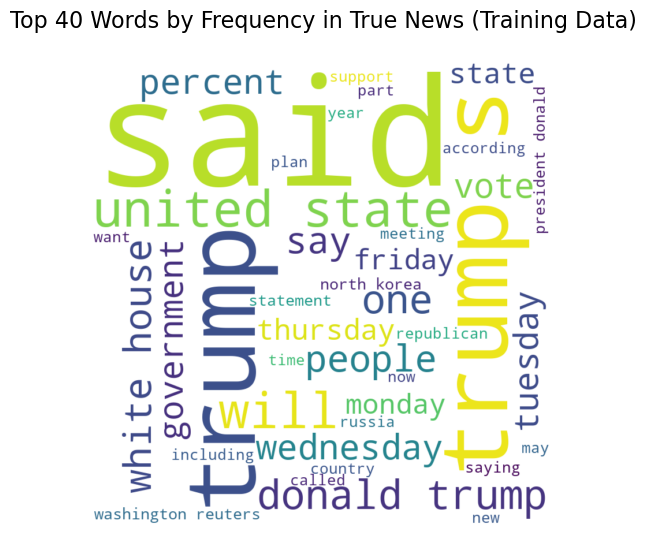

In [36]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud

# Filter the training data for true news (assuming you have a column 'news_label' for this)
true_news = train_df[train_df['news_label'] == 1]  # Assuming '1' indicates true news

# Process the text (assuming 'news_text' contains processed news text)
processed_text = ' '.join(true_news['news_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, max_words=40, background_color='white').generate(processed_text)

# Plot the word cloud
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Top 40 Words by Frequency in True News (Training Data)\n', fontsize=16)
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text 

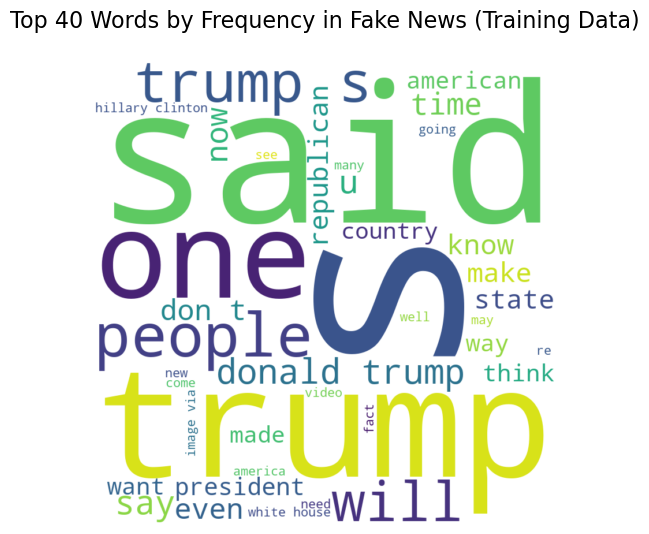

In [37]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter the training data for fake news (assuming you have a column 'news_label' for this)
fake_news = train_df[train_df['news_label'] == 0]  # Assuming '0' indicates fake news

# Process the text (assuming 'news_text' contains processed news text)
processed_text = ' '.join(fake_news['news_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, max_words=40, background_color='white').generate(processed_text)

# Plot the word cloud
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Top 40 Words by Frequency in Fake News (Training Data)\n', fontsize=16)
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text 




##### 4.3.1 Write a function to get the specified top n-grams 



In [38]:
# Write a function to get the specified top n-grams
def get_top_ngrams(corpus, ngram_range=(1,1), top_n=20):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vec.fit_transform(corpus.astype(str))
    ngrams = vec.get_feature_names_out()
    counts = X.sum(axis=0).A1  # Convert sparse matrix to flat array
    freq_dist = list(zip(ngrams, counts))
    sorted_ngrams = sorted(freq_dist, key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:top_n]

##### 4.3.2 Handle the NaN values 



In [39]:
# Handle NaN values in the text data
train_df.isnull().sum()

news_label                0
news_text                 0
pos_lemma                 0
text_character_length     0
lemma_character_length    0
dtype: int64

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph 

Top 10 Unigrams in True News:
said: 68805
trump: 40732
reuters: 19766
president: 18787
state: 14104
government: 13063
house: 12418
new: 12413
states: 11910
republican: 11117


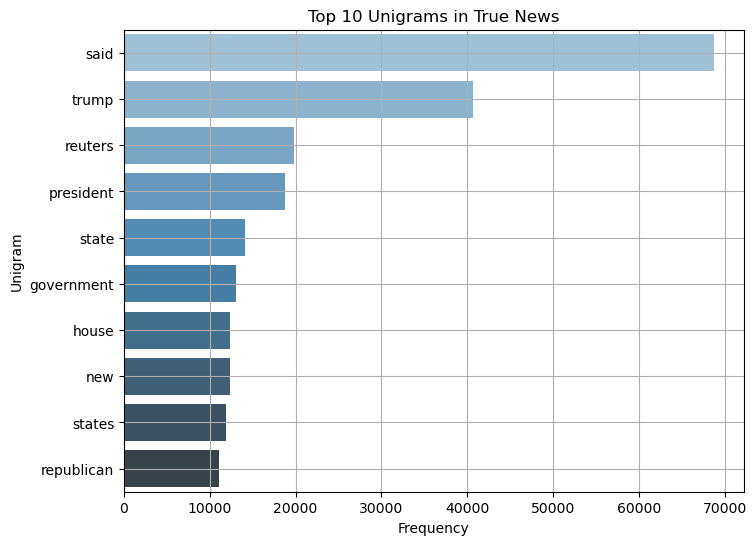

In [40]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_unigrams = get_top_ngrams(true_news['news_text'], ngram_range=(1, 1), top_n=10)

# Print the unigrams and their frequencies
print("Top 10 Unigrams in True News:")
for word, freq in top_unigrams:
    print(f"{word}: {freq}")

# Convert to DataFrame for easy plotting
uni_df = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(data=uni_df, x='Frequency', y='Unigram', palette='Blues_d')
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.grid(True)
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph 



Top 10 Bigrams in True News:
united states: 8594
donald trump: 7082
white house: 6268
washington reuters: 4540
north korea: 4474
president donald: 4112
new york: 3131
prime minister: 2907
said statement: 2790
trump said: 2525


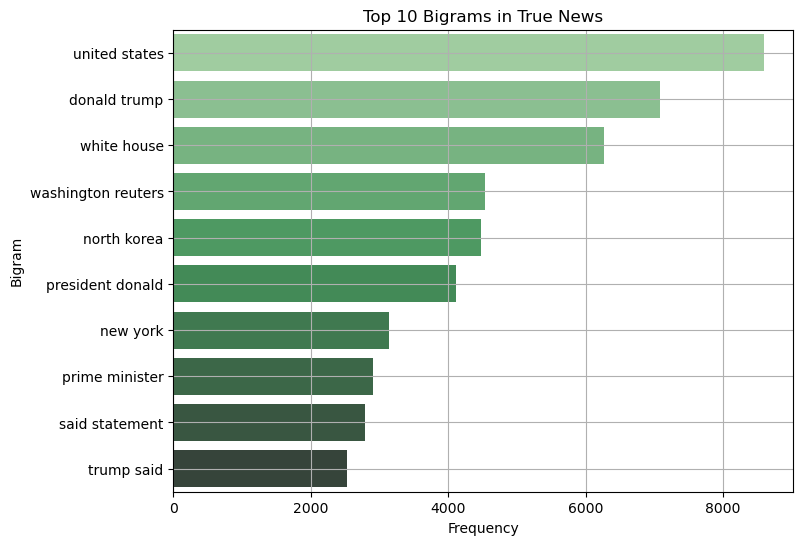

In [41]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams = get_top_ngrams(true_news['news_text'], ngram_range=(2, 2), top_n=10)

# Print the bigrams and their frequencies
print("Top 10 Bigrams in True News:")
for bigram, freq in top_bigrams:
    print(f"{bigram}: {freq}")

# Convert to DataFrame for plotting
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(data=bigram_df, x='Frequency', y='Bigram', palette='Greens_d')
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.grid(True)
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph 



Top 10 Trigrams in True News:
president donald trump: 4067
president barack obama: 2015
reuters president donald: 1099
washington reuters president: 957
white house said: 641
presidentelect donald trump: 570
president vladimir putin: 537
new york reuters: 512
state rex tillerson: 465
secretary state rex: 464


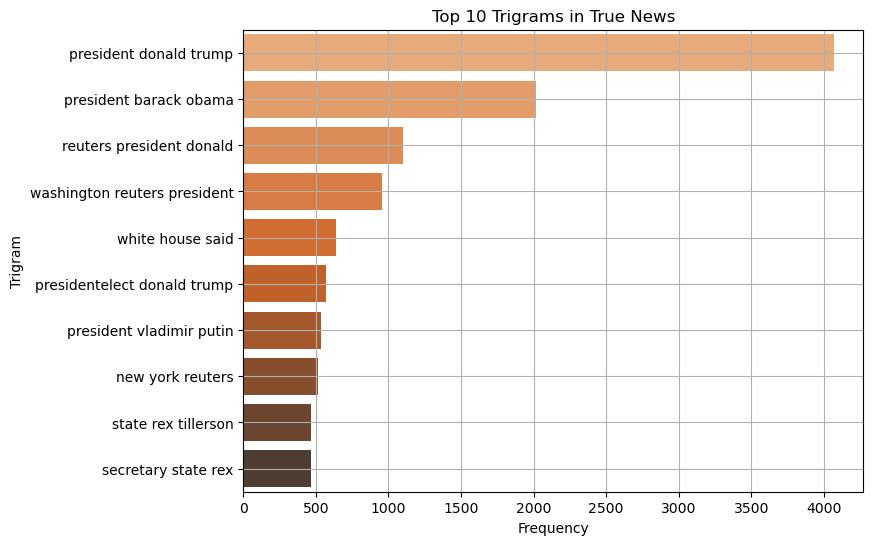

In [42]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams = get_top_ngrams(true_news['news_text'], ngram_range=(3, 3), top_n=10)

# Print the trigrams and their frequencies
print("Top 10 Trigrams in True News:")
for trigram, freq in top_trigrams:
    print(f"{trigram}: {freq}")

# Convert to DataFrame for plotting
trigram_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(data=trigram_df, x='Frequency', y='Trigram', palette='Oranges_d')
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.grid(True)
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph 

Top 10 Unigrams in Fake News:
trump: 57575
said: 22037
people: 18554
president: 18516
just: 15162
obama: 14026
clinton: 13292
like: 12659
donald: 12639
hillary: 11122


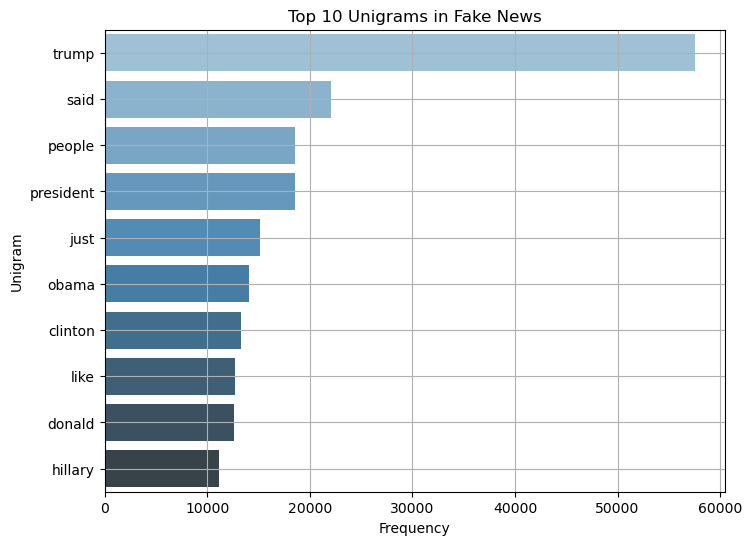

In [43]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_unigrams = get_top_ngrams(fake_news['news_text'], ngram_range=(1, 1), top_n=10)

# Print the unigrams and their frequencies
print("Top 10 Unigrams in Fake News:")
for word, freq in top_unigrams:
    print(f"{word}: {freq}")

# Convert to DataFrame for easy plotting
uni_df = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(data=uni_df, x='Frequency', y='Unigram', palette='Blues_d')
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.grid(True)
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph 



Top 10 Bigrams in Fake News:
donald trump: 11210
hillary clinton: 4993
white house: 4611
united states: 4232
new york: 2971
president trump: 2833
president obama: 2743
fox news: 2396
barack obama: 1614
supreme court: 1408


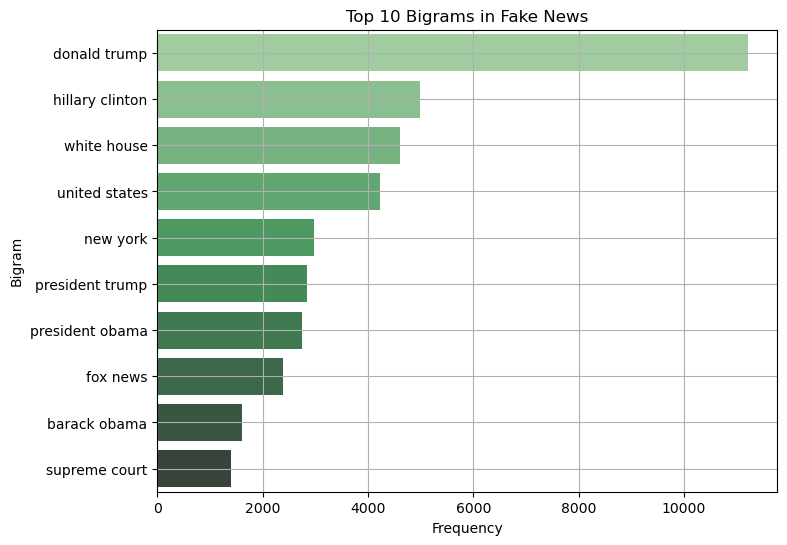

In [44]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams = get_top_ngrams(fake_news['news_text'], ngram_range=(2, 2), top_n=10)

# Print the bigrams and their frequencies
print("Top 10 Bigrams in Fake News:")
for bigram, freq in top_bigrams:
    print(f"{bigram}: {freq}")

# Convert to DataFrame for plotting
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(data=bigram_df, x='Frequency', y='Bigram', palette='Greens_d')
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.grid(True)
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph 



Top 10 Trigrams in Fake News:
donald trump realdonaldtrump: 1281
new york times: 1054
black lives matter: 995
news century wire: 662
president donald trump: 644
president united states: 618
president barack obama: 600
century wire says: 504
video screen capture: 489
image video screen: 480


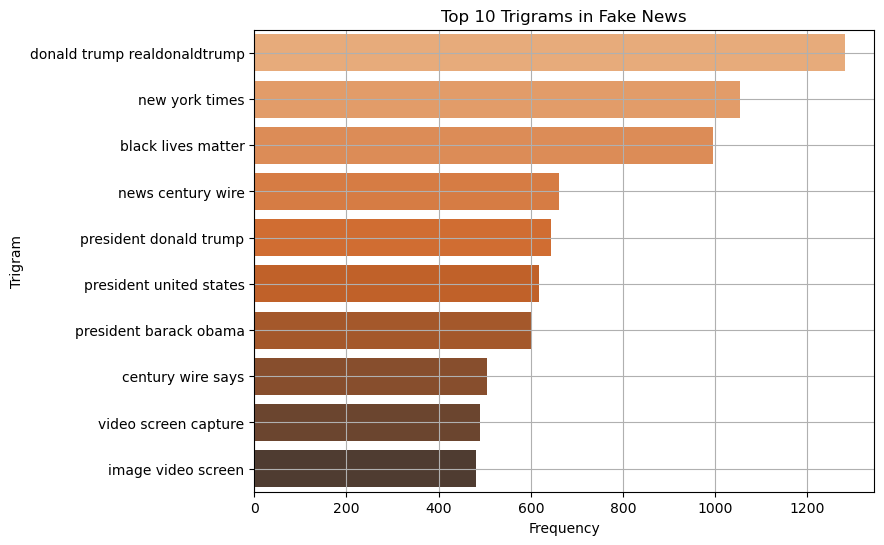

In [45]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams = get_top_ngrams(fake_news['news_text'], ngram_range=(3, 3), top_n=10)

# Print the trigrams and their frequencies
print("Top 10 Trigrams in Fake News:")
for trigram, freq in top_trigrams:
    print(f"{trigram}: {freq}")

# Convert to DataFrame for plotting
trigram_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(data=trigram_df, x='Frequency', y='Trigram', palette='Oranges_d')
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.grid(True)
plt.show()

## **5.** Exploratory Data Analysis on Validation Data 

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [46]:
# Add a new column to calculate the character length of cleaned news text
val_df['text_character_length'] = val_df['news_text'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
val_df['lemma_character_length'] = val_df['pos_lemma'].apply(len)

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

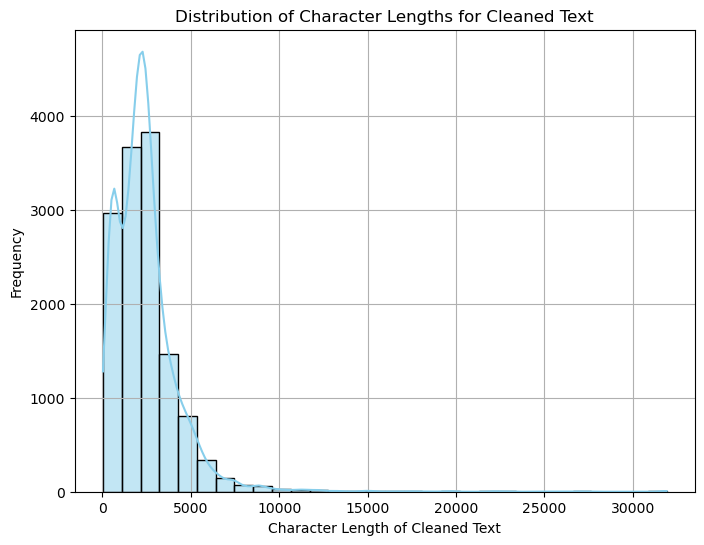

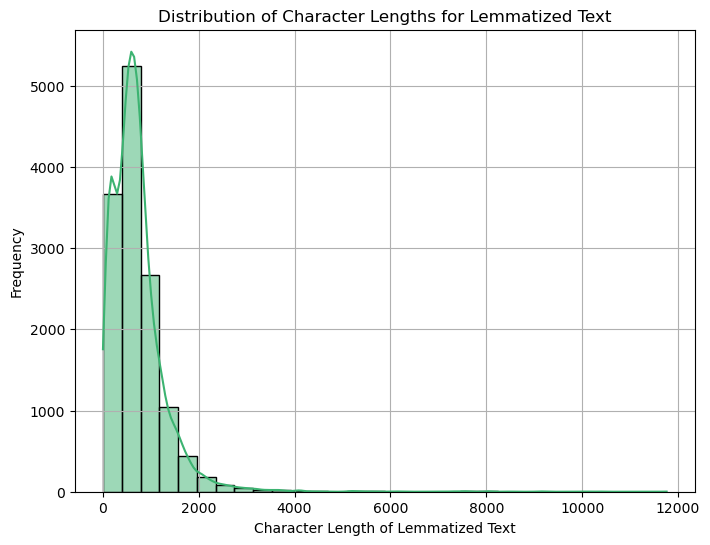

In [47]:
## Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text
plt.figure(figsize=(8, 6))
sns.histplot(val_df['text_character_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Character Lengths for Cleaned Text')
plt.xlabel('Character Length of Cleaned Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Add histogram for lemmatized news text with POS tags removed
plt.figure(figsize=(8, 6))
sns.histplot(val_df['lemma_character_length'], bins=30, kde=True, color='mediumseagreen')
plt.title('Distribution of Character Lengths for Lemmatized Text')
plt.xlabel('Character Length of Lemmatized Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

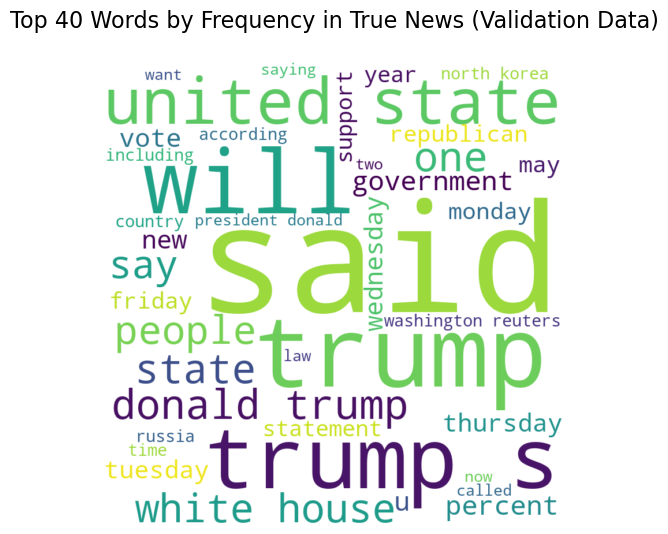

In [48]:
## Use a word cloud find the top 40 words by frequency among true news in the validation data after processing the text
from wordcloud import WordCloud

# Filter the validation data for true news (assuming you have a column 'news_label' for this)
true_news = val_df[val_df['news_label'] == 1]  # Assuming '1' indicates true news

# Process the text (assuming 'news_text' contains processed news text)
processed_text = ' '.join(true_news['news_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, max_words=40, background_color='white').generate(processed_text)

# Plot the word cloud
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Top 40 Words by Frequency in True News (Validation Data)\n', fontsize=16)
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

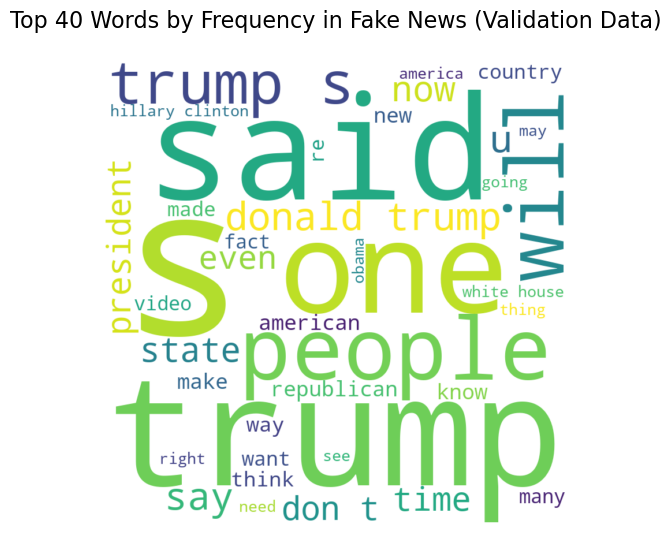

In [49]:
## Use a word cloud find the top 40 words by frequency among fake news in the validation data after processing the text

# Filter the validation data for fake news (assuming you have a column 'news_label' for this)
fake_news = val_df[val_df['news_label'] == 0]  # Assuming '0' indicates fake news

# Process the text (assuming 'news_text' contains processed news text)
processed_text = ' '.join(fake_news['news_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, max_words=40, background_color='white').generate(processed_text)

# Plot the word cloud
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Top 40 Words by Frequency in Fake News (Validation Data)\n', fontsize=16)
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

Same function written for Training Data EDA shall be used

##### 5.3.2 Handle the NaN values

In [50]:
## First handle NaN values in the text data
val_df.isnull().sum()

news_label                0
news_text                 0
pos_lemma                 0
text_character_length     0
lemma_character_length    0
dtype: int64

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

Top 10 Unigrams in True News:
said: 30252
trump: 18277
reuters: 8697
president: 8129
state: 6277
government: 5662
house: 5567
new: 5248
states: 4898
republican: 4861


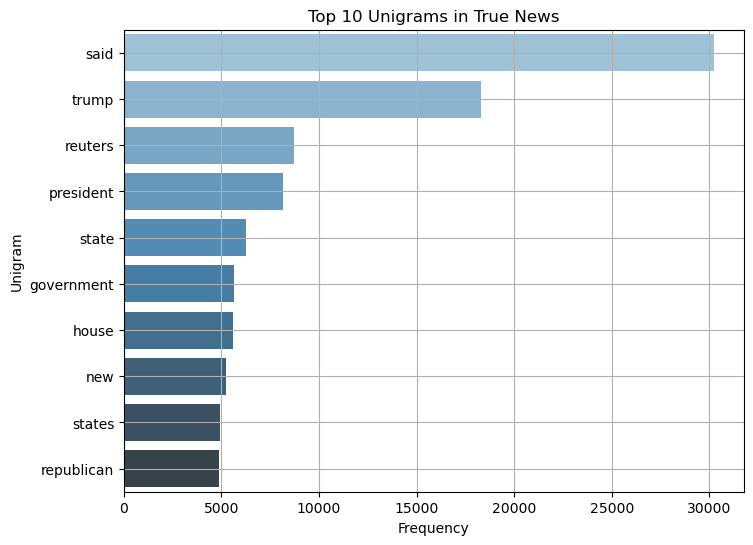

In [51]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_unigrams = get_top_ngrams(true_news['news_text'], ngram_range=(1, 1), top_n=10)

# Print the unigrams and their frequencies
print("Top 10 Unigrams in True News:")
for word, freq in top_unigrams:
    print(f"{word}: {freq}")

# Convert to DataFrame for easy plotting
uni_df = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(data=uni_df, x='Frequency', y='Unigram', palette='Blues_d')
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.grid(True)
plt.show()

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

Top 10 Bigrams in True News:
united states: 3623
donald trump: 3131
white house: 2910
washington reuters: 1948
president donald: 1818
north korea: 1813
new york: 1433
prime minister: 1271
said statement: 1143
told reuters: 1121


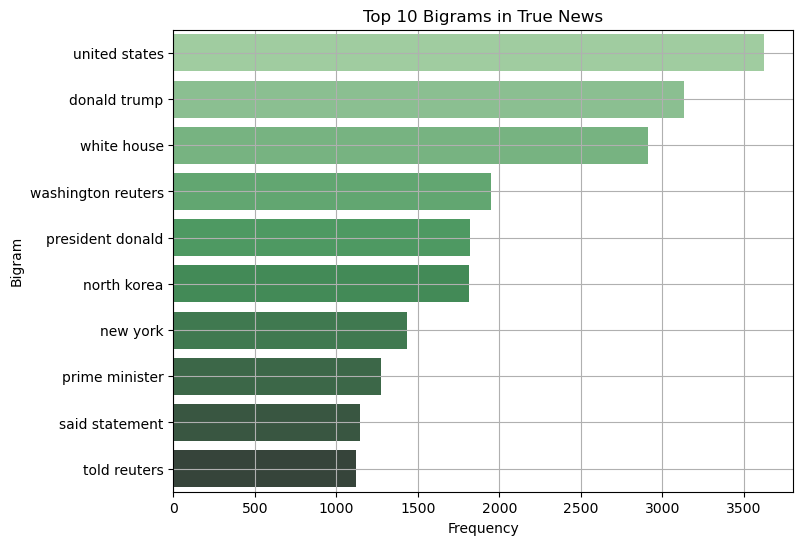

In [52]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams = get_top_ngrams(true_news['news_text'], ngram_range=(2, 2), top_n=10)

# Print the bigrams and their frequencies
print("Top 10 Bigrams in True News:")
for bigram, freq in top_bigrams:
    print(f"{bigram}: {freq}")

# Convert to DataFrame for plotting
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(data=bigram_df, x='Frequency', y='Bigram', palette='Greens_d')
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.grid(True)
plt.show()

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

Top 10 Trigrams in True News:
president donald trump: 1801
president barack obama: 881
reuters president donald: 463
washington reuters president: 392
white house said: 326
presidentelect donald trump: 262
president vladimir putin: 252
new york reuters: 230
secretary state rex: 208
state rex tillerson: 208


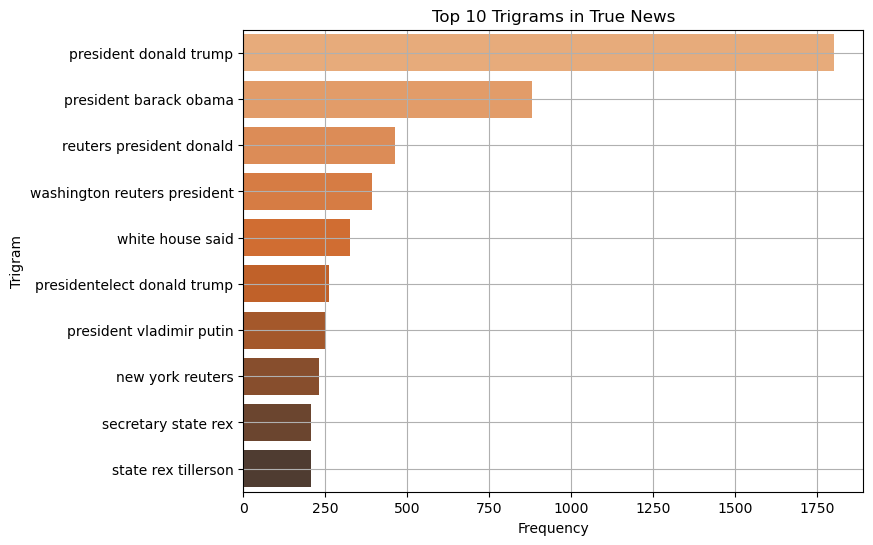

In [53]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams = get_top_ngrams(true_news['news_text'], ngram_range=(3, 3), top_n=10)

# Print the trigrams and their frequencies
print("Top 10 Trigrams in True News:")
for trigram, freq in top_trigrams:
    print(f"{trigram}: {freq}")

# Convert to DataFrame for plotting
trigram_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(data=trigram_df, x='Frequency', y='Trigram', palette='Oranges_d')
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.grid(True)
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

Top 10 Unigrams in Fake News:
trump: 24581
said: 9121
president: 8049
people: 7835
just: 6336
obama: 6227
clinton: 5736
donald: 5291
like: 5278
hillary: 4598


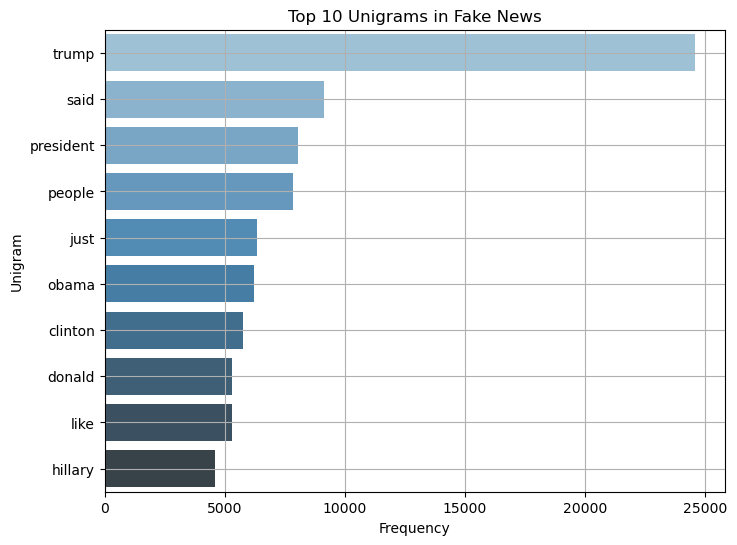

In [54]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_unigrams = get_top_ngrams(fake_news['news_text'], ngram_range=(1, 1), top_n=10)

# Print the unigrams and their frequencies
print("Top 10 Unigrams in Fake News:")
for word, freq in top_unigrams:
    print(f"{word}: {freq}")

# Convert to DataFrame for easy plotting
uni_df = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(data=uni_df, x='Frequency', y='Unigram', palette='Blues_d')
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.grid(True)
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

Top 10 Bigrams in Fake News:
donald trump: 4766
hillary clinton: 2116
white house: 2007
united states: 1920
new york: 1284
president trump: 1266
president obama: 1218
fox news: 1091
barack obama: 683
century wire: 575


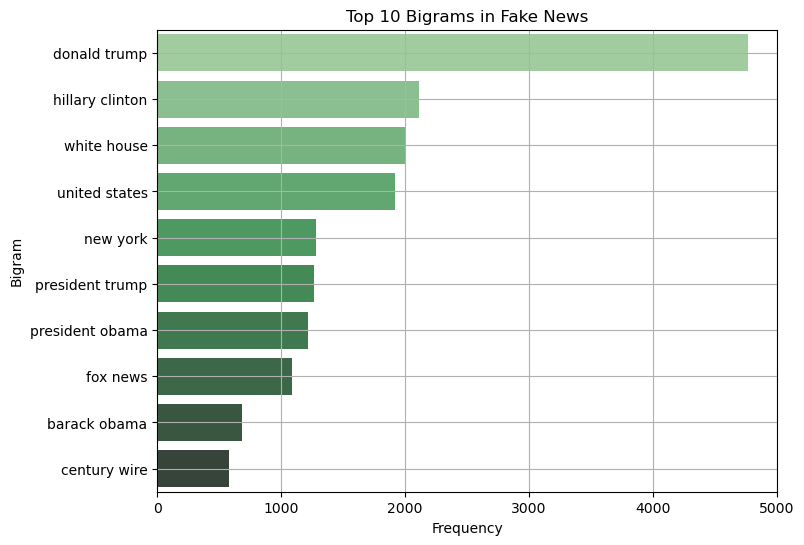

In [55]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams = get_top_ngrams(fake_news['news_text'], ngram_range=(2, 2), top_n=10)

# Print the bigrams and their frequencies
print("Top 10 Bigrams in Fake News:")
for bigram, freq in top_bigrams:
    print(f"{bigram}: {freq}")

# Convert to DataFrame for plotting
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(data=bigram_df, x='Frequency', y='Bigram', palette='Greens_d')
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.grid(True)
plt.show()

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

Top 10 Trigrams in Fake News:
new york times: 451
donald trump realdonaldtrump: 411
black lives matter: 387
president donald trump: 321
president united states: 293
news century wire: 279
president barack obama: 259
video screen capture: 235
century wire says: 223
image video screen: 215


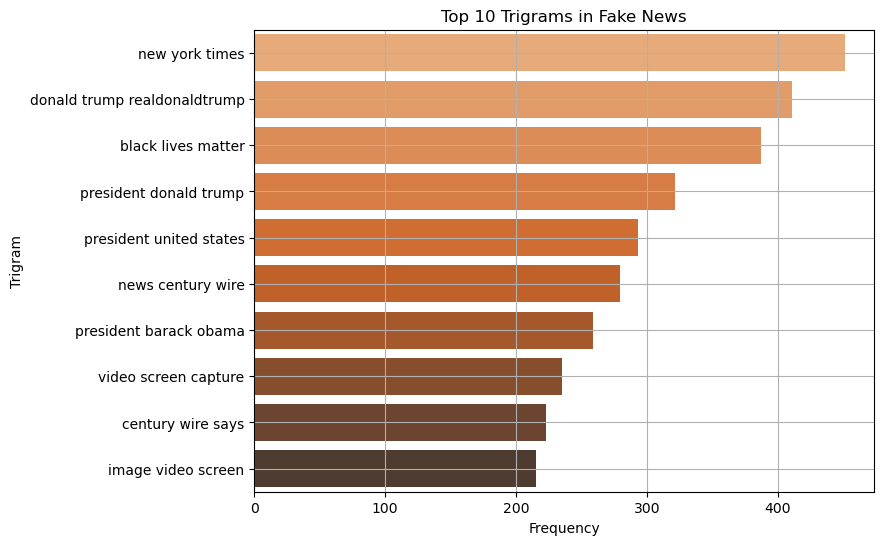

In [56]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams = get_top_ngrams(fake_news['news_text'], ngram_range=(3, 3), top_n=10)

# Print the trigrams and their frequencies
print("Top 10 Trigrams in Fake News:")
for trigram, freq in top_trigrams:
    print(f"{trigram}: {freq}")

# Convert to DataFrame for plotting
trigram_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(data=trigram_df, x='Frequency', y='Trigram', palette='Oranges_d')
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.grid(True)
plt.show()

## **6.** Feature Extraction 

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this project, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model 

In [57]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api

# Download and load the "word2vec-google-news-300" model
print("Downloading 'word2vec-google-news-300'...")
w2v_model = api.load("word2vec-google-news-300")
print("Model loaded successfully!")

Model loaded successfully!


### **6.2** Extract vectors for cleaned news data  

In [58]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def get_average_w2v_vector(text, model, vector_size=300):
    words = text.split()
    valid_words = [word for word in words if word in model]
    if not valid_words:
        return np.zeros(vector_size)  # Return zero vector if no valid words
    word_vectors = np.array([model[word] for word in valid_words])
    return word_vectors.mean(axis=0)

In [59]:
## Extract the target variable for the training data and validation data
# Apply to training data
train_vectors = train_df['news_text'].fillna('').apply(lambda x: get_average_w2v_vector(x, w2v_model))
train_vectors = np.vstack(train_vectors)

# Apply to validation data
val_vectors = val_df['news_text'].fillna('').apply(lambda x: get_average_w2v_vector(x, w2v_model))
val_vectors = np.vstack(val_vectors)

## **7.** Model Training and Evaluation 

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model 

##### 7.1.1 Create and train logistic regression model on training data 

In [61]:
## Initialise Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

## Train Logistic Regression model on training data
log_reg.fit(train_vectors, train_df['news_label'])

## Predict on validation data
val_preds_lr = log_reg.predict(val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data 

In [62]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
# Accuracy
accuracy = accuracy_score(val_df['news_label'], val_preds_lr)

# Precision
precision = precision_score(val_df['news_label'], val_preds_lr)

# Recall
recall = recall_score(val_df['news_label'], val_preds_lr)

# F1-Score
f1 = f1_score(val_df['news_label'], val_preds_lr)

# Print all metrics
print("-----Logistic Regression Performance Metrics-----")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

-----Logistic Regression Performance Metrics-----
Accuracy: 0.9586
Precision: 0.9500
Recall: 0.9646
F1-Score: 0.9572


In [63]:
# Classification Report
print("-----Logistic Regression Classification Report-----")
print(classification_report(val_df['news_label'], val_preds_lr))

-----Logistic Regression Classification Report-----
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      6996
           1       0.95      0.96      0.96      6474

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



### **7.2** Build Decision Tree Model 

##### 7.2.1 Create and train a decision tree model on training data 

In [64]:
## Initialise Decision Tree model
# You can adjust parameters like max_depth, criterion, etc.
decision_tree = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
decision_tree.fit(train_vectors, train_df['news_label'])

## Predict on validation data
val_preds_tree = decision_tree.predict(val_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data 

In [65]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
# Accuracy
accuracy = accuracy_score(val_df['news_label'], val_preds_tree)

# Precision
precision = precision_score(val_df['news_label'], val_preds_tree)

# Recall
recall = recall_score(val_df['news_label'], val_preds_tree)

# F1-Score
f1 = f1_score(val_df['news_label'], val_preds_tree)

# Print all metrics
print("-----Decision Tree Classification Performance Metrics-----")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

-----Decision Tree Classification Performance Metrics-----
Accuracy: 0.8978
Precision: 0.9069
Recall: 0.8775
F1-Score: 0.8920


In [66]:
# Classification Report
print("-----Decision Tree Classification Report-----")
print(classification_report(val_df['news_label'], val_preds_tree))

-----Decision Tree Classification Report-----
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6996
           1       0.91      0.88      0.89      6474

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



### **7.3** Build Random Forest Model 


##### 7.3.1 Create and train a random forest model on training data 

In [67]:
## Initialise Random Forest model
# You can adjust parameters like n_estimators, max_depth, etc.
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

## Train Random Forest model on training data
random_forest.fit(train_vectors, train_df['news_label'])

## Predict on validation data
val_preds_rf = random_forest.predict(val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data 

In [68]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
# Accuracy
accuracy = accuracy_score(val_df['news_label'], val_preds_rf)

# Precision
precision = precision_score(val_df['news_label'], val_preds_rf)

# Recall
recall = recall_score(val_df['news_label'], val_preds_rf)

# F1-Score
f1 = f1_score(val_df['news_label'], val_preds_rf)

# Print all metrics
print("-----Random Forests Classification Performance Metrics-----")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

-----Random Forests Classification Performance Metrics-----
Accuracy: 0.9562
Precision: 0.9544
Recall: 0.9544
F1-Score: 0.9544


In [69]:
# Classification Report
print("-----Random Forests Classification Report-----")
print(classification_report(val_df['news_label'], val_preds_rf))

-----Random Forests Classification Report-----
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6996
           1       0.95      0.95      0.95      6474

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



## **8.** Conclusion 


In achieving this high performance from all 3 classification models, the **Word2Vec** model has played a major role in the semantic processing of text dataset. With the huge size of word2vec-google-news-300 model used, the model was able to identify all the valid words and establish meaningful semantic relationships between the words.

After preprocessing and Word2Vec based feature extraction, three models were trained and tested.

- Logistic Regression delivered the best results in terms of accuracy and robustness.
- Random Forests Classifier also gave strong performance but slightly less accurate.
- Decision Tree Classifier while useful for interpretation, underperformed due to its tendency to overfit.

Thus, for practical applications of fake news detection on similar and bigger datasets, the **Logistic Regression** and **Random Forests Classifier** models are recommended.